In [26]:
##Machine Learning code example
import os, re
from PIL import Image
import numpy as np
import random

path = os.path.join(os.getcwd(), 'car')

##Clear the document
try:
    os.remove(os.path.join(path, '.DS_Store'))
    print('remove file success')
except:
    print('no file to be removed')
    
allDir = os.listdir(path)

##Create brand list for labeling
brand = []
for d in allDir:
    for f in os.listdir(os.path.join(path, d)):
        tmp = re.split(r'[0-9]+_',f)
        if not tmp[0] in brand:
            brand.append(tmp[0])
brand = sorted(brand)
print(brand)

def labeling(b):
    zList = np.zeros(len(brand))
    ind = brand.index(b)
    zList[ind] = 1
    return zList

def load_data(path):
    data = []
    listFiles = os.listdir(path)
    random.shuffle(listFiles)
    for f in listFiles:
        tmpFileName = re.split(r'[0-9]+_',f)
        label = labeling(tmpFileName[0])
        tmpImg = Image.open(os.path.join(path,f)).convert('RGB')
        data.append([np.array(tmpImg)/255, label]) #np.array(data)/255 => normalize the values of the pixels to be between 0 and 1 instead of 0 to 255
    return data

trainData = load_data(os.path.join(path, 'train'))
testData = load_data(os.path.join(path, 'test'))

trainImg = np.array([i[0] for i in trainData])
trainLabel = np.array([i[1] for i in trainData])
print(f'Train data shape : \n{trainImg.shape}\nTrain label shape: \n{trainLabel.shape}')
print(f'Train data : \n{trainImg}\nTrain label : \n{trainLabel}')

no file to be removed
['Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia', 'Daewoo', 'Dodge', 'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Lada', 'Lancia', 'Land Rover', 'Lexus', 'Maserati', 'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki', 'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo']
Train data shape : 
(18717, 50, 50, 3)
Train label shape: 
(18717, 40)
Train data : 
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.     

In [38]:
##Machine Learning proccess
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras import backend

def build_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding='valid', activation = 'relu', input_shape = (50, 50, 3)))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding='valid', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding='valid', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(len(brand), activation = 'softmax'))
    model.summary()
    return model

model = build_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['acc'])
val_num = 4679
trainImg1 = backend.cast_to_floatx(trainImg)
train_data = trainImg1[:-val_num]
val_data = trainImg1[-val_num:]

trainLabel1 = backend.cast_to_floatx(trainLabel)
train_label = trainLabel1[:-val_num]
val_label = trainLabel1[-val_num:]
train_history = model.fit(train_data, train_label, batch_size = 256,  epochs = 11, validation_data = (val_data,val_label))
# 將模型儲存至 HDF5 檔案中
model.save('./car_brand_model.h5')  # creates a HDF5 file 


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 64)         

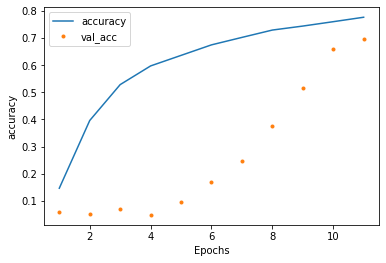

In [40]:
import matplotlib.pyplot as plt

plt.plot(range(1, 12), train_history.history['acc'], '-', label='accuracy')
plt.plot(range(1, 12), train_history.history['val_acc'], '.', label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()


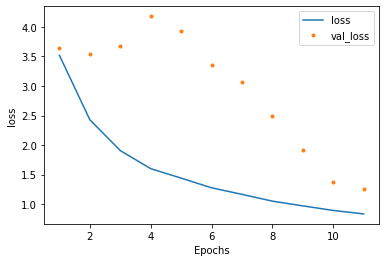

In [42]:
plt.plot(range(1, 12), train_history.history['loss'], '-', label='loss')
plt.plot(range(1, 12), train_history.history['val_loss'], '.', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [28]:
for k,v in train_history.history.items():
    print(k)

loss
acc
val_loss
val_acc


In [43]:
##Show the train model accuracy result
score = model.evaluate(trainImg1, trainLabel1)
print('\nTrain Acc:' + str(score[1]*100) + '%')

testImg = np.array([i[0] for i in testData])
testLabel = np.array([i[1] for i in testData])

testImg1 = backend.cast_to_floatx(testImg)
testLabel1 = backend.cast_to_floatx(testLabel)

score = model.evaluate(testImg1, testLabel1)
print('\nTest Acc: ' + str(score[1]*100) + '%')

585/585 [==============================] - 15s 25ms/step - loss: 0.8913 - acc: 0.7714

Train Acc:77.14377045631409%
65/65 [==============================] - 2s 24ms/step - loss: 1.2235 - acc: 0.7001

Test Acc: 70.01455426216125%


(50, 50, 3)
[2.2447250e-21 3.7522881e-28 8.7151797e-29 2.6130122e-28 7.2330651e-33
 1.1636937e-24 1.4878630e-26 6.2750403e-27 1.0535565e-19 9.8065823e-31
 9.8366880e-27 0.0000000e+00 1.7953010e-26 2.6788671e-29 7.2707689e-26
 4.0503165e-32 4.5187890e-29 2.8273084e-31 9.0910334e-19 9.5079023e-33
 6.9590563e-31 8.0955784e-19 4.1752863e-32 1.5119197e-29 6.2891777e-35
 2.4795188e-25 7.2014716e-22 1.2390309e-21 2.3114813e-19 6.7962946e-31
 6.8090340e-24 1.8724573e-28 1.0000000e+00 9.5229393e-31 1.7424156e-20
 1.0316143e-36 3.0065102e-31 2.1371245e-21 6.0130391e-22 2.9445186e-36]
32
Skoda 100.0


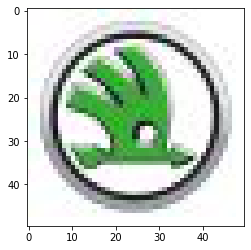

In [29]:
##Test model accuracy with out of training data
import matplotlib.pyplot as plt
from PIL import Image

realImg = Image.open('./Skoda.jpg').convert('RGB')
realImg.size
realImg = np.array(realImg)/255
print(realImg.shape)

result = model.predict(np.array(realImg).reshape(-1, 50, 50, 3))
print(result[0])
preIndex = np.argmax(result[0])
print(preIndex)
print(brand[preIndex], result[0][preIndex]*100)
plt.imshow(realImg)